In [1]:
import shutil
shutil.copy2('/content/drive/My Drive/Dataset/Dataset.zip','.')

'./Dataset.zip'

In [2]:
from zipfile import ZipFile
fname='Dataset.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
import os
os.mkdir('dataset')

In [4]:
#covid=0    normal=1     pneumonia=2
shutil.move('covid','dataset')
shutil.move('normal','dataset')


os.chdir('dataset')
os.rename('covid','0')
os.rename('normal','1')

os.chdir('../')

In [5]:
import random
os.chdir('dataset')
if os.path.isdir('train/0/') is False:
  os.mkdir('train')
  os.mkdir('test')
  os.mkdir('valid')

  for i in range(0,2):
    shutil.move(f'{i}','train')
    os.mkdir(f'test/{i}')
    os.mkdir(f'valid/{i}')

    num=70
    if(i==0):
      num=30

    test_samples=random.sample(os.listdir(f'train/{i}'),num)
    for j in test_samples:
      shutil.move(f'train/{i}/{j}',f'test/{i}')

    valid_samples=random.sample(os.listdir(f'train/{i}'),num)
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}',f'valid/{i}') 

os.chdir("../")  

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [7]:
!ls

dataset  Dataset.zip  drive  pneumonia	sample_data


In [8]:
train_datagen=image.ImageDataGenerator(
     rescale=1./255,
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=.1,
    shear_range=.1,
    horizontal_flip=True
                                       )

test_datagen=image.ImageDataGenerator(
    rescale=1./255
                                       )
valid_datagen=image.ImageDataGenerator(
    rescale=1./255
                                       )

In [9]:
train_path='dataset/train'
test_path='dataset/test'
valid_path='dataset/valid'

In [10]:
train_gen=train_datagen.flow_from_directory(
    train_path,
    target_size=(448,448),
    batch_size=32,
    classes=['0','1']
)

test_gen=test_datagen.flow_from_directory(
    test_path,
    target_size=(448,448),
    batch_size=32,
    classes=['0','1']
)

valid_gen=valid_datagen.flow_from_directory(
    valid_path,
    target_size=(448,448),
    batch_size=32,
    classes=['0','1']
)

Found 1227 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [48]:
from tensorflow.keras.optimizers import Adam
model.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 448, 448, 32)      896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 448, 448, 32)      9248      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 448, 448, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 224, 224, 64)      18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 224, 224, 64)     

In [42]:
model.fit(train_gen,validation_data=valid_gen,epochs=15,batch_size=64,verbose=2,shuffle=True)

Epoch 1/15
39/39 - 84s - loss: 0.4293 - accuracy: 0.8150 - val_loss: 0.2033 - val_accuracy: 0.9400
Epoch 2/15
39/39 - 83s - loss: 0.1890 - accuracy: 0.9405 - val_loss: 0.4129 - val_accuracy: 0.8900
Epoch 3/15
39/39 - 83s - loss: 0.2081 - accuracy: 0.9332 - val_loss: 0.1002 - val_accuracy: 0.9600
Epoch 4/15
39/39 - 82s - loss: 0.1155 - accuracy: 0.9625 - val_loss: 0.0665 - val_accuracy: 0.9700
Epoch 5/15
39/39 - 82s - loss: 0.1660 - accuracy: 0.9389 - val_loss: 0.1221 - val_accuracy: 0.9500
Epoch 6/15
39/39 - 84s - loss: 0.1174 - accuracy: 0.9519 - val_loss: 0.4045 - val_accuracy: 0.9000
Epoch 7/15
39/39 - 83s - loss: 0.1067 - accuracy: 0.9658 - val_loss: 0.0445 - val_accuracy: 0.9800
Epoch 8/15
39/39 - 82s - loss: 0.1028 - accuracy: 0.9650 - val_loss: 0.0633 - val_accuracy: 0.9800
Epoch 9/15
39/39 - 83s - loss: 0.0998 - accuracy: 0.9690 - val_loss: 0.1243 - val_accuracy: 0.9700
Epoch 10/15
39/39 - 83s - loss: 0.0804 - accuracy: 0.9780 - val_loss: 0.1322 - val_accuracy: 0.9700
Epoch 11/

In [43]:
predictions=model.predict(test_gen)

In [44]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes,rotation=0)

  if normalize:
    cm=cm.astype('float')/am.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [45]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_true=test_gen.classes,y_pred=np.argmax(predictions,axis=-1))

Confusion matrix,without normalization
[[10 20]
 [19 51]]


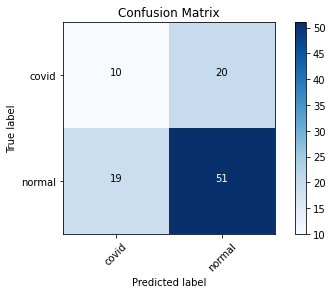

In [46]:
cm_plot_labels=['covid','normal']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')